Drawing the corner from HDFBackend. You can apply different burnin to it, and you can get extra information (e.g. chi^2) from it.

In [22]:
from emcee.backends import HDFBackend
import numpy as np
import corner
import matplotlib.pyplot as plt

In [23]:
backend = HDFBackend('./backend_t.bin', read_only=True)

In [24]:
chi2 = -backend.get_log_prob()

[]

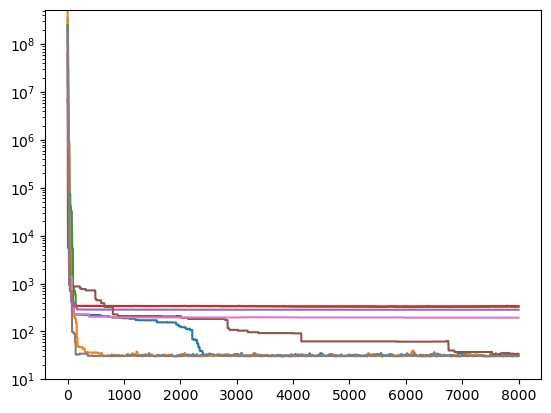

In [25]:
for i in range(0, 40, 5):
    plt.plot(chi2[:,i])
plt.ylim(bottom=10)
plt.semilogy()

In [26]:
chain = backend.get_chain(discard=0, flat=False)

In [31]:
chain.shape

(8000, 40, 3)

In [32]:
selected_chain = chain[1000:, chi2.min(axis=0) < 60, :]

In [33]:
names = ('lgMmin', 'sig_lgM', 'Amp')

In [34]:
selected_chain2 = selected_chain.reshape(-1, 3)

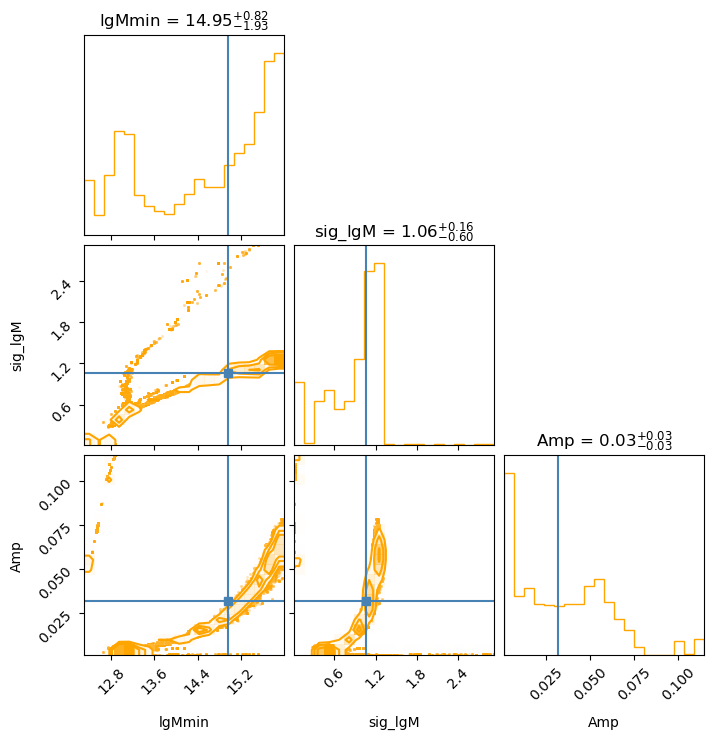

In [35]:
fig = corner.corner(selected_chain2, labels=names, show_titles=True, color='orange', truths=np.percentile(selected_chain2, 50, axis=0))